In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Create trajectory utils methods

In [192]:
# Generate 2d zig_zag path
def generate_zig_zag_path(x_start, y_start, n_points, x_d): 
    
    pts = [(x_start, y_start)]
    for i in range(0, n_points):
        if i > 0:
            pt_ = (x_start+i*x_d, (-1)**i*y_start)
            pts.append(pt_)
    return np.array(pts)


def Linear_waypoints(ps, pg, n):
    
    x = np.linspace(ps[0], pg[0], n)
    y = np.linspace(ps[1], pg[1], n)
    z = np.linspace(ps[2], pg[2], n)

    return np.stack((x, y, z), axis=-1)
        
def cast2np(x): 
    return np.array(x)

In [30]:
pts = generate_zig_zag_path(1, 0.1, 10, 0.5)

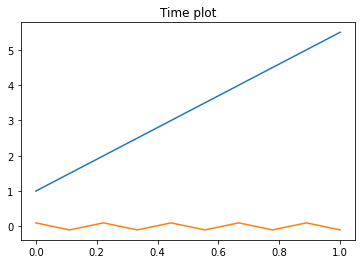

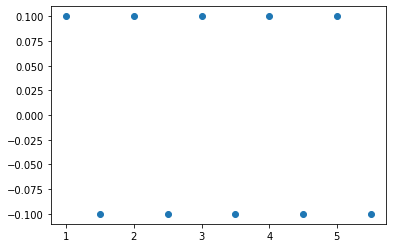

In [36]:
plt.figure()
t_param = np.linspace(0, 1, pts.shape[0])
plt.plot(t_param, pts[:, 0])
plt.plot(t_param, pts[:, 1])
plt.title("Time plot")

plt.figure()
plt.scatter(pts[:, 0], pts[:, 1])

In [67]:

        
print(wpts_.shape)

(37, 3)


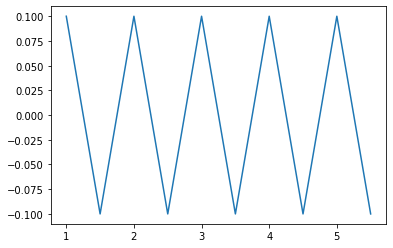

In [68]:
plt.plot(wpts_[:, 0], wpts_[:, 1])

## Hypothesis



Our hypothesis is that we have collection of the touch points. Which we have to touch. 
For the purpose of the simplicity, we can use simple points on the space, just to test our algorithm. 

In [78]:
x = np.linspace(0, 15, 50)
y = np.sin(x)

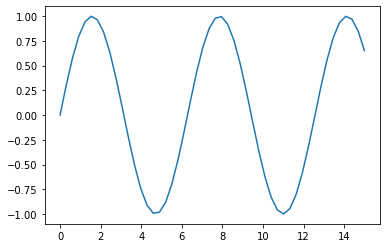

In [79]:
plt.plot(x, y)

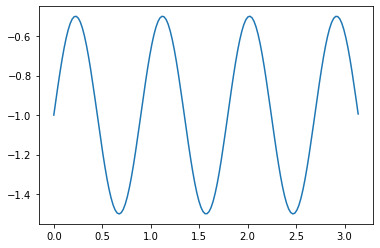

In [90]:
y_lim = 0.5 # Defines max amplitude (wall distance)
num_pts = 5
x = np.linspace(0, 3.14, 150) # Defines how many contact points will we have, 3.14 is full sinusoide wave [1 contact point]
y = y_lim * np.sin((num_pts + 2)*x) - 1
plt.plot(x, y)

In [128]:
def parabola(x, a=1, b=0, c=0): 
    return a*x**2 + b*x + c 

x = np.linspace(-5, 5, 100)
# Parabola without b and c element 
y = parabola(x, 2, 0, 0)

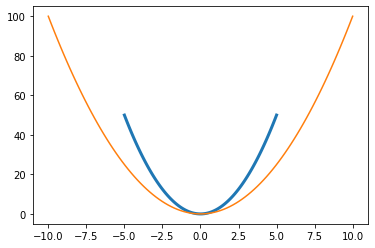

In [129]:
plt.plot(x, y, linewidth=3)
plt.plot(2*x, parabola(2*x))

In [113]:
def poly_f(x, order): 
    return x**order

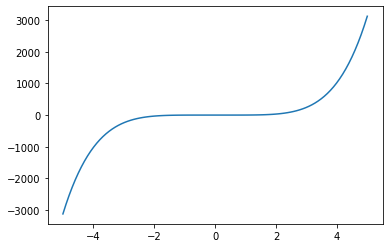

In [116]:
y = poly_f(x, 5)
plt.plot(x, y)

### Bezier? 

Why is bezier different than any kind of polynomials used for any kind of the path parametrization

In [237]:
pts = generate_zig_zag_path(0, 0.5, 10, 0.5)

In [238]:
def quad_bezier(p0, p1, p2, t_min=0, t_max=1): 
    t = np.linspace(t_min, t_max, 100)
    bezier_x = (1-t)*p0[0] + 2*t*(1-t)*p1[0] + t**2*p2[0]
    bezier_y = (1-t)*p0[1] + 2*t*(1-t)*p1[1] + t**2*p2[1]
    return bezier_x, bezier_y

In [239]:
# First one
p0 = cast2np(pts[0, :]) 
p1 = cast2np(pts[1, :]) 
p2 = cast2np(pts[2, :])
# Second one
b0 = cast2np(pts[2, :])
b1 = cast2np(pts[3, :])
b2 = cast2np(pts[4, :])
# Third one
c0 = cast2np(pts[4, :])
c1 = cast2np(pts[5, :])
c2 = cast2np(pts[6, :])
# Fourth one
d0 = cast2np(pts[6, :])
d1 = cast2np(pts[7, :])
d2 = cast2np(pts[8, :])

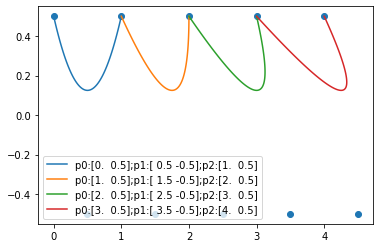

In [240]:
#p1 = p1 + np.array([0, 0.1])
bzr_x, bzr_y = quad_bezier(p0, p1, p2, t_min=0, t_max=1)
#b1 = b1 + np.array([0, 0.05])
pzr_x, pzr_y = quad_bezier(b0, b1, b2)
czr_x, czr_y = quad_bezier(c0, c1, c2)
dzr_x, dzr_y = quad_bezier(d0, d1, d2)
plt.figure()
plt.scatter(pts[:, 0], pts[:, 1])
plt.plot(bzr_x, bzr_y, label=f'p0:{p0};p1:{p1};p2:{p2}')
plt.plot(pzr_x, pzr_y, label=f'p0:{b0};p1:{b1};p2:{b2}')
plt.plot(czr_x, czr_y, label=f'p0:{c0};p1:{c1};p2:{c2}')
plt.plot(dzr_x, dzr_y, label=f'p0:{d0};p1:{d1};p2:{d2}')
plt.legend()
# https://math.umd.edu/~immortal/MATH431/book/ch_bezier.pdf
# Figure out why are they skewed to this point? Hmm... 

In [154]:
print(bzr)

[1.         1.02009999 1.03999592 1.05968779 1.07917559 1.09845934
 1.11753903 1.13641465 1.15508622 1.17355372 1.19181716 1.20987654
 1.22773186 1.24538312 1.26283032 1.28007346 1.29711254 1.31394756
 1.33057851 1.34700541 1.36322824 1.37924702 1.39506173 1.41067238
 1.42607897 1.4412815  1.45627997 1.47107438 1.48566473 1.50005102
 1.51423324 1.52821141 1.54198551 1.55555556 1.56892154 1.58208346
 1.59504132 1.60779512 1.62034486 1.63269054 1.64483216 1.65676972
 1.66850321 1.68003265 1.69135802 1.70247934 1.71339659 1.72410978
 1.73461892 1.74492399 1.755025   1.76492195 1.77461484 1.78410366
 1.79338843 1.80246914 1.81134578 1.82001837 1.82848689 1.83675135
 1.84481175 1.8526681  1.86032038 1.8677686  1.87501275 1.88205285
 1.88888889 1.89552087 1.90194878 1.90817264 1.91419243 1.92000816
 1.92561983 1.93102745 1.936231   1.94123049 1.94602592 1.95061728
 1.95500459 1.95918784 1.96316702 1.96694215 1.97051321 1.97388022
 1.97704316 1.98000204 1.98275686 1.98530762 1.98765432 1.9897